<a href="https://colab.research.google.com/github/vvvu/potential-chainsaw/blob/main/Chapter%203%20k%E8%BF%91%E9%82%BB%E6%B3%95/Chpater_3_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 一、基本概念
- **一句话总结**：选择离输入点最近的K个点，哪一种class label的点越多，输入点就归属于哪一种class label
- k近邻法（k-nearest neighbor, k-NN）是一种基本「分类与回归」方法，本章**只讨论分类问题中的k近邻法**

- kNN不具有显式的学习过程，其**实际上是利用数据集对特征空间进行划分**

- k近邻的**三个基本要素**
  1. k值的选择
  2. 距离度量
  3. 分类决策规则
  
- k近邻的基本做法：在空间中已有`training set`的情况下，对空间中新输入的输入点`s`，首先确定输入点`s`的k个在`training set`中的最近邻点 $p \in \text{training\ set}$，然后根据这个k个点的所属类别的多寡来决定当前输入点的`s`的类别
  
  - 最近邻法：$k = 1$ 时的特殊情况，即离输入点最近的训练点作为输入点的类别
  
- k近邻模型
  - cell - 单元，每个训练实例点 $x_i$ 都拥有一个单元。一个cell是空间中的一个区域，在该区域中的点，离$x_i$点的距离比离训练实例中其他任何点的距离都要近。
  - class label - 综上，最近邻法将实例 $x_i$ 的类 $y_i$ 作为其单元中所有点的类标记`class label`，所以新进入的点如果在当前 $x_i$ 所对应的cell中，我们就认为它的`class label`等同于 $x_i$ 的`class label`

- **基本三要素**
  1. 距离度量：特征空间中的距离度量常常是两个实例点相似程度的反映，距离度量公式如下**「注意：不同的距离度量所确定的最近邻点是不同的」**

     其中，$p$ 的不同取值代表不同的距离

     - p = 1, Manhattan distance
     - p = 2, Euclidean distance，欧氏距离也是我们一般使用的距离度量
     - p = $\infty$, 各个坐标的最大值
  $$
  L_p(x_i, x_j) = (\sum_{l=1}^n|x_{i}^{(l)} - x_{j}^{(l)}|^p)^\frac{1}{p}, \text{where } p \geq.1
  $$
  2. k值的选择

     - k值较小：Model复杂，容易overfitting
     - k值较大：Model简单

     特殊情况：$k = N$时，$N$ 代表类别的个数。此时模型过于简单，忽略大量有效信息，不可取

     **应用：**k值一般取一个较小的数值，通过**交叉验证法**来选择最优的k值

  3. 分类决策规则：一般情况下为**多数表决**

In [10]:
import numpy as np
import pandas as pd

'''
1. 朴素kNN算法，没有使用kd-tree进行优化
'''
class kNN:
  def __init__(self, x_train_instance, y_train_instance, k_neighbors = 3, p = 2):
    """
    parameter: p 距离度量
    """
    self.k = k_neighbors
    self.p = p
    self.x_train_instance = x_train_instance # 训练实例点的坐标
    self.y_train_instance = y_train_instance # 训练实例点的class label

  def predict(self, x):
    """
    预测输入点x的class label
    """
    # 取出k_neighbors个最近点的class label
    k_dist_list = []
    for i in range(len(self.x_train_instance)):
      # 计算和所有x_train_instance的距离，排序，取前k
      # 优化：K smallest elements in an array
      dist = np.linalg.norm(x - self.x_train_instance[i], ord = self.p) # 距离度量公式
      k_dist_list.append((dist, self.y_train_instance[i])) # (距离，class label)

    k_dist_list.sort() # 对第一个元素进行排序

    k_neighbor_label = []
    for i in range(self.k):
      k_neighbor_label.append(k_dist_list[i][1])

    # 获取list中出现次数最多的class label
    max_label = max(k_neighbor_label, key = k_neighbor_label.count)
    return max_label

  def score(self, X_test, y_test):
    correct = 0
    for X, y in zip(X_test, y_test):
      predicted_label = self.predict(X)
      if predicted_label == y:
        correct += 1
    return correct / len(X_test)

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
clf = kNN(X_train, y_train) # 存入测试样例（实际上kNN没有显式学习过程，这一步只是单纯存入数据）
clf.score(X_test, y_test) # 1.0，说明分类准确

0.95

### 二、疑难解释 - 构造和搜索kd-tree

- 不同的 **k** 的含义：kd-tree的 **k** 指的是 k 维空间，kNN的 **k** 指的是最近的 k 个邻居

- kd-tree解决的问题：**如何对训练数据进行快速k近邻搜索**，在维度大以及训练数据容量大时尤为重要

- 定义：kd-tree是一种对**k维空间**中的点进行存储以便对其进行快速检索的树形数据结构
  1. 是一种二叉树，表示对k维空间的一种划分（partition），本质相当于构造kd-tree不断用垂直于某个维度的坐标轴的超平面进行切分，构成一系列k维超矩形区域
  2. 划分原则：如果选取对应维度的坐标轴上的中点（median），则划分得到的为**平衡kd-tree**

- 平衡kd-tree
  - 平衡kd-tree的搜索效率未必是最优的「因为数据集在空间中的分布是不均匀的，导致新输入的数据点的`class label`不能直接由其叶子结点决定，很多时候我们还需要去搜索其父节点的另一叶子结点」
  - 中位数的选择：要选择实际存在的点，例如$[2,5,9,4,8,7]$，其中位数为$6$但其并没有对应**实际存在的点**，所以我们选择的中位数为$7$

#### 1. 构造kd-tree

- 常规kd-tree的构造
  1. 构造根节点，根节点对应k维空间中包含所有实例的超矩形区域
  2. 递归构造：选择一个坐标轴和此坐标轴上的**一个切分点**，确定一个垂直于该坐标轴的超平面将该超矩形分割。此时实例被分到左右两个子区域（子节点），这个过程直到子区域内没有实例时停止

- 平衡kd-tree的构造
  1. 构造根节点，选择维度$n=1$作为第一次分割的坐标轴，选取切分点`median`，得到深度为1的左、右子节点：其中左子节点对应坐标小于`median`的作为左子节点，反之作为右子节点
  2. 递归构造：对深度为$j$的节点，选择维度$n = l$作为切分的坐标轴，其中$l = j \mod k + l$，$k$ 代表 $k$ 维空间

#### 2. 搜索kd-tree
利用kd-tree优化最近邻搜索问题：
- 输入：已构造的kd-tree，目标点x
- 输出：x的最近邻
搜索步骤：
1. 从root开始，根据target_point在对应分割维度axis上是否小于/大于当前节点，分别向左或者向右遍历
2. 一旦算法到达leaf node，我们认为leaf node是「当前最近点」，即距离target node最近的点
3. 向上回溯
4. 如果回溯的过程中遇到的节点，比「当前最近点」离target node更近，那么它就称为当前最近点
5. ⭐️在适当的情况下判断兄弟节点：以target node为球心，「当前最近点」到target node的距离为radius，组成超球体c（最近点一定在超球体中）。判断兄弟节点的区域是否和超球体c相交：
  1. 「超球体c和其父节点所代表的分割超平面相交」：说明兄弟节点代表的区域中，可能有距离target_node更近的点
  2. 「超球体c和其父节点所代表的分割超平面不相交」：说明兄弟节点的区域和超球体c完全没有关联，不可能存在距离target_node更近的点

In [14]:
class kdNode:
  def __init__(self, location, axis, left, right):
    self.location = location # 节点位置
    self.axis = axis # 分隔时该节点以哪个axis为基础进行分割
    self.left = left
    self.right = right

class kdTree:
  def __init__(self, data):
    k = len(data[0]) # 数据维度，k dimension

    def buildTree(axis, dataset):
      '''
      1. 按照第axis维进行分割dataset
      '''
      if not dataset:
        return None

      # Sort data and choose median as pivot element to build balanced kd-tree
      dataset.sort(key = lambda x: x[axis])
      median_pos = len(dataset) // 2
      median = dataset[median_pos]
      
      new_axis = (axis + 1) % k # 选择下一个用来分割的维度
      return kdNode(median, axis,
                    buildTree(new_axis, dataset[:median_pos]),
                    buildTree(new_axis, dataset[median_pos + 1:]))

    self.root = buildTree(0, data) # 从第0维开始构建kd-tree，返回root
    
def kdTreePreOrder(kdRoot):
  print(kdRoot.location)
  if kdRoot.left:
    kdTreePreOrder(kdRoot.left)
  if kdRoot.right:
    kdTreePreOrder(kdRoot.right)

'''
Test kd-tree
'''
data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
kdtree = kdTree(data)
kdTreePreOrder(kdtree.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [15]:
# #### 2. 搜索kd-tree
# 利用kd-tree优化最近邻搜索问题：
# - 输入：已构造的kd-tree，目标点x
# - 输出：x的最近邻
# 搜索步骤：
# 1. 从root开始，根据target_point在对应分割维度axis上是否小于/大于当前节点，分别向左或者向右遍历
# 2. 一旦算法到达leaf node，我们认为leaf node是「当前最近点」，即距离target node最近的点
# 3. 向上回溯
# 4. 如果回溯的过程中遇到的节点，比「当前最近点」离target node更近，那么它就称为当前最近点
# 5. 在适当的情况下判断兄弟节点：以target node为球心，「当前最近点」到target node的距离为radius，组成超球体c（最近点一定在超球体中）。判断兄弟节点的区域是否和超球体c相交：
#   1. 「超球体c和其父节点所代表的分割超平面相交」：说明兄弟节点代表的区域中，可能有距离target_node更近的点
#   2. 「超球体c和其父节点所代表的分割超平面不相交」：说明兄弟节点的区域和超球体c完全没有关联，不可能存在距离target_node更近的点

def eudist(point1, point2): # point1, point2的欧氏距离
  return sqrt(sum((p1 - p2)**2 for p1, p2 in zip(point1, point2)))

'''
Original Code Snippets:
https://nbviewer.jupyter.org/github/fengdu78/lihang-code/blob/master/%E7%AC%AC03%E7%AB%A0%20k%E8%BF%91%E9%82%BB%E6%B3%95/3.KNearestNeighbors.ipynb

对构建好的kd树进行搜索，寻找与目标点最近的样本点
'''
from math import sqrt
from collections import namedtuple

# 定义一个增强版的tuple - namedtuple，分别存放
'''
（1）最近坐标点
（2）最近距离
（3）访问过的节点数
'''
result = namedtuple("Result_tuple", 
                    "nearest_point  nearest_dist  nodes_visited")

def find_nearest(tree, target_node):
  k = len(target_node) # 数据维度

  def traverse(kdnode, target_node, radius):
    '''
    radius代表前文提到的超球体的半径
    '''
    if kdnode is None:
      return result([0] * k, float("inf"), 0)
      '''
      if kdnode is None:
        最近坐标点：[0] * k
        最近距离：float("inf")
        访问过的节点数：0
      '''
      
    nodes_visited = 1

    axis = kdnode.axis # 进行分割的维度
    pivot = kdnode.location # 分割点

    # 1. 从root开始，根据target_node在对应分割维度axis上是否小于/大于当前节点，分别向左或者向右遍历
    if target_node[axis] <= pivot[axis]:
      shorter_node = kdnode.left
      further_node = kdnode.right
    else:
      shorter_node = kdnode.right
      further_node = kdnode.left

    # 向下遍历
    # 2. 一旦算法到达leaf node，我们认为leaf node是「当前最近点」，即距离target node最近的点
    leaf_node = traverse(shorter_node, target_node, radius)
    
    # 3. 向上回溯
    # 4. 如果回溯的过程中遇到的节点，比「当前最近点」离target node更近，那么它就称为当前最近点
    nearest = leaf_node.nearest_point # 以此叶节点作为「当前最近点」
    dist = leaf_node.nearest_dist # 更新最近距离

    nodes_visited += leaf_node.nodes_visited

    if dist < radius:
      radius = dist # 最近点在以目标点为球心，半径为radius的超球体内

    # 5. 在适当的情况下判断兄弟节点：以target node为球心，「当前最近点」到target node的距离为radius，组成超球体c（最近点一定在超球体中）。判断兄弟节点的区域是否和超球体c相交：
    #   1. 「超球体c和其父节点所代表的分割超平面相交」：说明兄弟节点代表的区域中，可能有距离target_node更近的点
    #   2. 「超球体c和其父节点所代表的分割超平面不相交」：说明兄弟节点的区域和超球体c完全没有关联，不可能存在距离target_node更近的点
    
    # 判断到超平面的距离
    hyperplane_distance = abs(pivot[axis] - target_node[axis])

    if radius < hyperplane_distance: # 如果超球体和超平面不相交
      return result(nearest, dist, nodes_visited) # 直接返回，说明兄弟节点代表的区域中不可能存在距离target_node更近的点
    else: # 相交，判断兄弟节点
      # 先判断和其父节点的距离
      eu_dist = eudist(pivot, target_node) # 计算target_node和当前分割点pivot的欧氏距离，即其父节点的欧氏距离
      if eu_dist < dist: # 和父节点较为接近
        nearest = pivot # 更新最近点
        dist = eu_dist # 更新最近距离
        radius = dist # 更新超球体
      # 检查兄弟节点
      sibling_node = traverse(further_node, target_node, radius)

      nodes_visited += sibling_node.nodes_visited
      if sibling_node.nearest_dist < dist: # 如果兄弟节点存在更近距离
        nearest = sibling_node.nearest_point # 更新最近点
        dist = sibling_node.nearest_dist # 更新最近距离

      return result(nearest, dist, nodes_visited)

  return traverse(tree.root, target_node, float("inf"))

In [16]:
'''
Test
'''

from time import clock
from random import random

def random_vector(k, n):
  '''
  产生n个k维随机向量，每个维度的值在[0-1]之间
  '''
  def random_point(k):
    return [random() for _ in range(k)]

  return [random_point(k) for _ in range(n)]

N = 100000
t0 = clock()
random_kdtree = kdTree(random_vector(5, N)) # 产生10万个，5维的样本点
target_node, = random_vector(5, 1) 
# 产生1个5维的目标点，寻找该目标点的距离最近的点
# 注意这里产生的实际上是一个[[1,2,3,4,5]]这样的5维向量
# 我们可以用一个,来将其解包

t1 = clock()
print("time: ", t1 - t0, "s")
print("target_node: ", target_node, "\nnearest_distance: ", find_nearest(random_kdtree, target_node))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time:  1.3268859999999996 s
target_node:  [0.6594064280804822, 0.04459308520437655, 0.23511316743704735, 0.892009598934484, 0.8999420668629361] 
nearest_distance:  Result_tuple(nearest_point=[0.659313730339249, 0.04695815327738462, 0.25617697322234934, 0.849004330174963, 0.855924649071562], nearest_dist=0.06508665196583029, nodes_visited=55)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


### 三、习题
**3.1** 参照图3.1，在二维空间中给出实例点，画出k为1和2时的k近邻法构成的空间划分，并对其进行比较，体会k值选择与模型复杂度及预测准确率的关系。
- 显然，当k值较大时（$k=2$），模型较为复杂（可以从决策边界看出来，决策边界曲折较多，$k=1$时决策边界较为简单）

In [26]:
'''
original websites: https://nbviewer.jupyter.org/github/fengdu78/lihang-code/blob/master/%E7%AC%AC03%E7%AB%A0%20k%E8%BF%91%E9%82%BB%E6%B3%95/3.KNearestNeighbors.ipynb
'''
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0], [16, 10, 0], [13, 19, 0],
                 [13, 32, 1], [17, 27, 1], [18, 24, 1], [20, 20,
                                                         0], [23, 14, 1],
                 [23, 25, 1], [23, 31, 1], [26, 8, 0], [30, 17, 1],
                 [30, 26, 1], [34, 8, 0], [34, 19, 1], [37, 28, 1]])
X_train = data[:, 0:2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
          KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
models = (clf.fit(X_train, y_train) for clf in models)

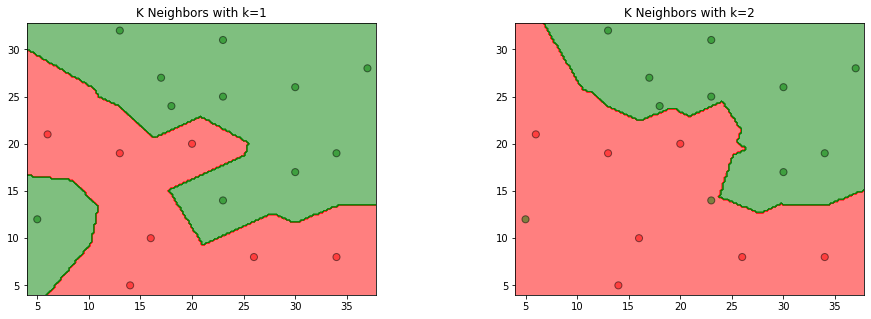

In [27]:
titles = ('K Neighbors with k=1', 'K Neighbors with k=2')

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Z))])
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()

**3.2** 利用例题3.2构造的kd-tree求点$x=(3,4.5)^T$的最近邻点

In [17]:
print(find_nearest(kdtree, [3, 4.5])) # 书上习题，寻找[3, 4.5]的最近点

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


**3.3** 参照算法3.3，写出输出为x的k近邻的算法

In [18]:
# 见前文代码
pass